Voy a definir el chun scoring, para ello voy a necesitar medir distintas variables:

1- La puntuación en las reviews.

2- Tiempo de recepción del producto.

3-Ticket medio.

In [267]:
import pandas as pd

1- ANALIZO LA PUNTUACIÓN EN LAS REVIEWS POR CLIENTE

Datasets utilizados: Olist orders & olist_order_reviews

In [268]:
olist_orders= pd.read_csv("olist_orders_dataset.csv")

In [269]:

olist_order_reviews= pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_reviews.info()
#Todo en orden, en la puntuación, que es lo que me interesa, no hay nulos.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [270]:
#Merge de Reviews con el dataset de orders porque en esta no tengo customer id
#Así uno reseña con cliente
reviews_por_cliente = olist_order_reviews.merge(olist_orders[["order_id", "customer_id"]], on="order_id", how="left")
#reviews_por_cliente 

In [271]:
#En realidad aquí sacar la media no tiene sentido porque solo tenemos una compra, 
#pero quiero definirlo todo bien para que sea extrapolable a otros proyectos.
media_review = reviews_por_cliente.groupby("customer_id")["review_score"].mean().reset_index()
#media_review

In [272]:
media_review.to_pickle("media_review_data.pkl")
#formato Pickle, que es el formato nativo de Python para almacenar objetos.
#Hago esto para llevármelo al notebook de confirmación de hipótesis

In [273]:
#Clasificación reviews. Había hecho esto pero me lía más, lo dejo
#def clasificar_satisfaccion(score):
    #if score >= 4.5:
        #return "Alta"
    #elif score >= 3:
        #return "Media"
    #else:
        #return "Baja"

In [274]:
#Nuevo df
#media_review["satisfaccion de cliente"] = media_review['review_score'].apply(clasificar_satisfaccion)
#media_review.head(3)

2- ANALIZO TIEMPO DE RECEPCIÓN DEL PRODUCTO POR PARTE DEL CLIENTE

Datasets utilizados: Olist orders

In [275]:
#Hay que pasarlo a formato datatime o da error porque es un object, como me pasaba en la definición del churn 
olist_orders["order_purchase_timestamp"] = pd.to_datetime(olist_orders["order_purchase_timestamp"])
olist_orders["order_delivered_customer_date"] = pd.to_datetime(olist_orders["order_delivered_customer_date"])
olist_orders["order_estimated_delivery_date"] = pd.to_datetime(olist_orders["order_estimated_delivery_date"])


In [276]:
#Saco cuántos días tarda en enviarse, otra vez hay que poner el dt.days
tiempo_envio = (olist_orders["order_delivered_customer_date"] - olist_orders["order_purchase_timestamp"]).dt.days
#tiempo_envio

In [277]:
#Agrego la columna del tiempo de envío 
olist_orders["tiempo_envio"] = tiempo_envio
olist_orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_envio
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0


In [278]:
#la media va a ser como el tiempo, porque solo tengo datos de una compra, pero para que sea extrapolable
media_envios = olist_orders.groupby("customer_id")["tiempo_envio"].mean().reset_index()
media_envios

,customer_id,tiempo_envio
0,00012a2ce6f8dcda20d059ce98491703,13.0
1,000161a058600d5901f007fab4c27140,9.0
2,0001fd6190edaaf884bcaf3d49edf079,5.0
3,0002414f95344307404f0ace7a26f1d5,28.0
4,000379cdec625522490c315e70c7a9fb,11.0
...,...,...
99436,fffecc9f79fd8c764f843e9951b11341,12.0
99437,fffeda5b6d849fbd39689bb92087f431,17.0
99438,ffff42319e9b2d713724ae527742af25,5.0
99439,ffffa3172527f765de70084a7e53aae8,12.0


In [279]:
media_envios.to_pickle("media_envios_data.pkl")
#formato Pickle, que es el formato nativo de Python para almacenar objetos.
#Hago esto para llevármelo al notebook de confirmación de hipótesis

3- ANALIZO EL TICKET MEDIO POR CLIENTE

Datasets utilizados: Olist orders &olist_order_items

In [280]:
olist_order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,b51593916b4b8e0d6f66f2ae24f2673d
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,84c5d4fbaf120aae381fad077416eaa0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,29309aa813182aaddc9b259e31b870e6
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,b5e6afd5a41800fdf401e0272ca74655


In [281]:
#Cargo dataset de items porque el de orders ya lo tengo
olist_order_items= pd.read_csv("olist_order_items_dataset.csv")
olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [282]:
#Mergeo para tener customer id
olist_order_items = olist_order_items.merge(olist_orders[["order_id", "customer_id"]], on="order_id", how="left")
#olist_order_items.head(2)

In [283]:
#Agrupo por order id para obtener el valor total de cada pedido
ticket_por_venta = olist_order_items.groupby("order_id")["price"].sum().reset_index()
ticket_por_venta

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [284]:

#Mergeo con orders para asociar la información del cliente a ticket_por_venta
ticket_por_venta= olist_orders.merge(ticket_por_venta, on="order_id")
#ticket_por_venta

In [285]:

#Agrupo por customer id para sacar la media de compra por cada cliente
media_ticket_por_venta = ticket_por_venta.groupby("customer_id")["price"].mean().reset_index()
#media_ticket_por_venta

In [286]:

#Voy a cambiar el nombre de la columna para que me quede claro qué es
media_ticket_por_venta.columns = ["customer_id", "media_valor_ticket_por_venta"]
media_ticket_por_venta

,customer_id,media_valor_ticket_por_venta
0,00012a2ce6f8dcda20d059ce98491703,89.80
1,000161a058600d5901f007fab4c27140,54.90
2,0001fd6190edaaf884bcaf3d49edf079,179.99
3,0002414f95344307404f0ace7a26f1d5,149.90
4,000379cdec625522490c315e70c7a9fb,93.00
...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,78.00
98662,fffecc9f79fd8c764f843e9951b11341,54.90
98663,fffeda5b6d849fbd39689bb92087f431,47.90
98664,ffff42319e9b2d713724ae527742af25,199.90


In [287]:
media_ticket_por_venta.to_pickle("media_ticket_medio_data.pkl")
#formato Pickle, que es el formato nativo de Python para almacenar objetos.
#Hago esto para llevármelo al notebook de confirmación de hipótesis

In [288]:
data_churn = pd.read_pickle("ultima_compra.pkl")
#data_churn

UNIFICACIÓN DE TODA LA INFO EN UN SOLO DATASET

In [289]:
toda_la_data = data_churn.merge(media_review, on='customer_id') \
                  .merge(media_envios, on='customer_id') \
                  .merge(media_ticket_por_venta, on='customer_id') 

In [290]:
toda_la_data.head(1)

,customer_id,order_purchase_timestamp,dias_desde_ultima_compra,churn,review_score,tiempo_envio,media_valor_ticket_por_venta
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,336,1,1.0,13.0,89.8


In [291]:
data_merged = pd.merge(toda_la_data, olist_orders, on='customer_id', how='left')
data_merged

,customer_id,order_purchase_timestamp_x,dias_desde_ultima_compra,churn,review_score,tiempo_envio_x,media_valor_ticket_por_venta,order_id,order_status,order_purchase_timestamp_y,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,tiempo_envio_y
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,336,1,1.0,13.0,89.80,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,13.0
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,457,1,4.0,9.0,54.90,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,9.0
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,595,1,5.0,5.0,179.99,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,5.0
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,426,1,5.0,28.0,149.90,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,28.0
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,197,1,4.0,11.0,93.00,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97912,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,213,1,5.0,4.0,78.00,620ddc9fbe3e445676a8e71d4a830821,delivered,2018-03-17 00:55:27,2018-03-17 01:35:21,2018-03-17 17:58:48,2018-03-21 19:24:46,2018-04-05,4.0
97913,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,201,1,3.0,12.0,54.90,814d6a3a7c0b32b2ad929ac6328124e9,delivered,2018-03-29 16:59:26,2018-03-29 17:10:27,2018-03-31 14:29:38,2018-04-10 17:20:49,2018-04-27,12.0
97914,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,147,0,4.0,17.0,47.90,8c855550908247a7eff50281b92167a8,delivered,2018-05-22 13:36:02,2018-05-22 13:54:37,2018-05-25 13:25:00,2018-06-08 18:03:31,2018-06-29,17.0
97915,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,125,0,5.0,5.0,199.90,83b5fc912b2862c5046555ded1483ae9,delivered,2018-06-13 16:57:05,2018-06-13 17:20:23,2018-06-15 18:52:00,2018-06-18 18:33:05,2018-06-25,5.0


In [292]:
# Valor medio de compra
avg_order_value = data_merged['media_valor_ticket_por_venta'].mean()

# Compras anuales por cliente activo
compras_anuales = data_merged[data_merged['churn'] == 0].groupby('customer_id')['order_id'].count().mean()

# Estimación de clientes churned en un año
churned_anual = data_merged[data_merged['churn'] == 1]['customer_id'].nunique()

# Pérdida anual total
valor_perdido_anual = avg_order_value * compras_anuales * churned_anual

# Estimación de recuperación si reducimos el churn un 10%
recuperacion_10 = valor_perdido_anual * 0.10

print(f"Valor perdido anual estimado: {valor_perdido_anual:.0f} €")
print(f"Reduciendo un 10% el churn se podrían recuperar: {recuperacion_10:.0f} €")

Valor perdido anual estimado: 9567985 €
Reduciendo un 10% el churn se podrían recuperar: 956799 €


In [293]:
# Contar clientes churned por año
clientes_churn = toda_la_data[toda_la_data['churn'] == 1]
clientes_perdidos = clientes_churn['customer_id'].nunique()

# Si los datos son anuales, el número de clientes perdidos ya es anual
clientes_perdidos_por_ano = clientes_perdidos
clientes_perdidos_por_ano

69568

C:\Users\nerea\AppData\Local\Temp\ipykernel_13172\70434701.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values_ticket, x='churn', y='media_valor_ticket_por_venta', palette='YlOrBr')  # Colores amarillos


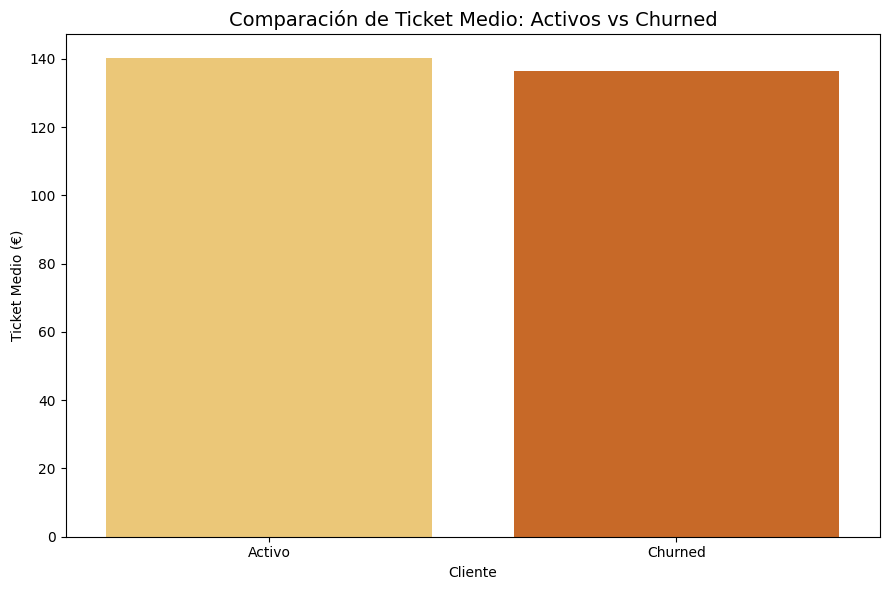

C:\Users\nerea\AppData\Local\Temp\ipykernel_13172\70434701.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values_tiempo, x='churn', y='tiempo_envio', palette='YlOrBr')  # Colores amarillos


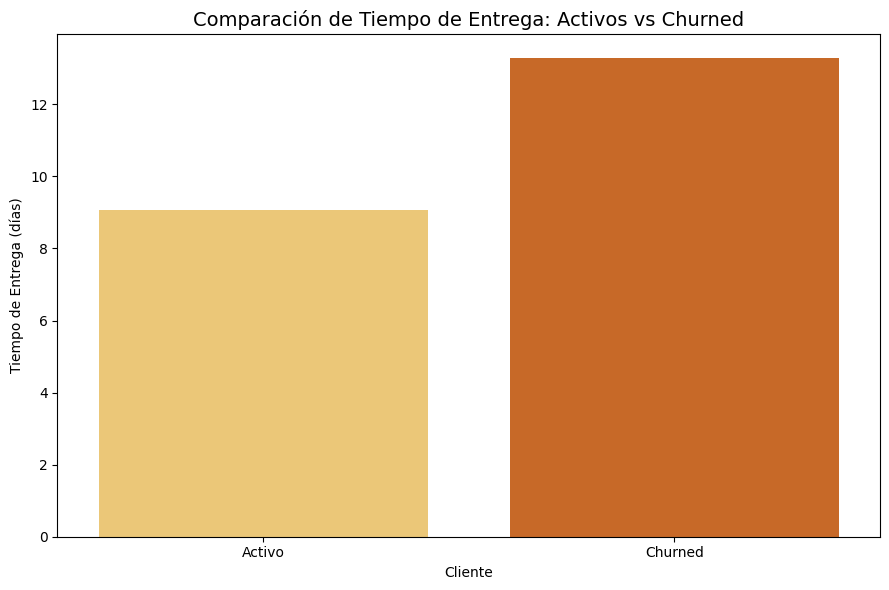

C:\Users\nerea\AppData\Local\Temp\ipykernel_13172\70434701.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_values_review, x='churn', y='review_score', palette='YlOrBr')  # Colores amarillos


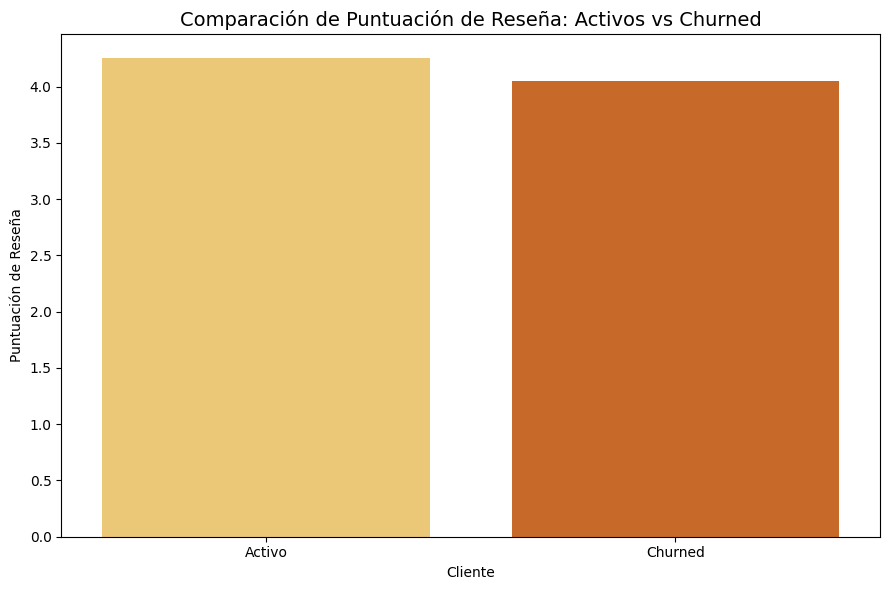

In [294]:
# 1. Gráfico para Ticket Medio
mean_values_ticket = toda_la_data.groupby('churn')['media_valor_ticket_por_venta'].mean().reset_index()
mean_values_ticket['churn'] = mean_values_ticket['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_ticket, x='churn', y='media_valor_ticket_por_venta', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Ticket Medio: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Ticket Medio (€)')
plt.tight_layout()
plt.show()

# 2. Gráfico para Tiempo de Entrega
mean_values_tiempo = toda_la_data.groupby('churn')['tiempo_envio'].mean().reset_index()
mean_values_tiempo['churn'] = mean_values_tiempo['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_tiempo, x='churn', y='tiempo_envio', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Tiempo de Entrega: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Tiempo de Entrega (días)')
plt.tight_layout()
plt.show()

# 3. Gráfico para Puntuación de Reseña
mean_values_review = toda_la_data.groupby('churn')['review_score'].mean().reset_index()
mean_values_review['churn'] = mean_values_review['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_review, x='churn', y='review_score', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Puntuación de Reseña: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Puntuación de Reseña')
plt.tight_layout()
plt.show()

-------------------------------------------------------------------------------------------------------
CONFIRMACIÓN DE HIPÓTESIS
-------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
#Este análisis estadístico 
#usa el Test T de Student para comparar medias entre dos grupos: clientes que hicieron churn (1) y activos (0).

CONFIRMO A PEOR REVIEW MAYOR CHURN

In [ ]:
churned = toda_la_data[toda_la_data["churn"] == 1]["review_score"]
active = toda_la_data[toda_la_data["churn"] == 0]["review_score"]
t3, p3 = ttest_ind(churned, active, equal_var=False)

CONFIRMO TICKET MEDIO + SI NO ES CHURN

In [ ]:
churned = toda_la_data[toda_la_data["churn"] == 1]["media_valor_ticket_por_venta"]
active = toda_la_data[toda_la_data["churn"] == 0]["media_valor_ticket_por_venta"]
t1, p1 = ttest_ind(churned, active, equal_var=False)

In [ ]:
print("Test de review_score:    t = {:.3f}, p = {:.4f}".format(t3, p3))

In [ ]:
print("Test de media_valor_ticket_por_venta: t = {:.3f}, p = {:.4f}".format(t1, p1))

CORFIRMO SI EL TIEMPO DE ENTREGA INFLUYE EN EL CHURN

In [ ]:
print(toda_la_data["tiempo_envio"].isna().sum())

In [ ]:
print(toda_la_data["tiempo_envio"].shape)

In [ ]:
data_clean = toda_la_data.dropna(subset=["tiempo_envio"])
#Decido eliminar los nan porque solo suponen alrededor de un 2% del total de datos

In [ ]:
churned = data_clean[data_clean["churn"] == 1]["tiempo_envio"]
active = data_clean[data_clean["churn"] == 0]["tiempo_envio"]
t2, p2 = ttest_ind(churned, active, equal_var=False)


In [ ]:
print("Test de delivery_time:   t = {:.3f}, p = {:.4f}".format(t2, p2))

In [ ]:
# 1. Calcular la media de media_valor_ticket_por_venta para churned y active
mean_values = toda_la_data.groupby('churn')['media_valor_ticket_por_venta'].mean().reset_index()

# 2. Crear el gráfico de barras
plt.figure(figsize=(8,6))
sns.barplot(x='churn', y='media_valor_ticket_por_venta', data=mean_values, palette='Set2')

# 3. Personalizar el gráfico
plt.title('Valor Promedio de Compra según Churn', fontsize=14)
plt.xlabel('Churn (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Valor Promedio de Compra (Media Valor Ticket)', fontsize=12)
plt.xticks([0, 1], ['No Churn', 'Churn'], rotation=0)

# 4. Mostrar el gráfico
plt.show()


CREACIÓN DE CHURN SCORING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Tengo que escalar las variables

scaler = MinMaxScaler()
toda_la_data[["media_valor_ticket_por_venta", "tiempo_envio", "review_score"]] = scaler.fit_transform(
    toda_la_data[["media_valor_ticket_por_venta", "tiempo_envio", "review_score"]]
)

In [ ]:
#Calculo churn scoring
toda_la_data["churn_score"] = (
    0.4 * (1 - toda_la_data["media_valor_ticket_por_venta"]) +  #Invertimos avg_order_value porque un valor más bajo puede indicar churn
    0.3 * toda_la_data["tiempo_envio"] +          #Tiempo de entrega más largo puede aumentar el churn
    0.3 * (1 - toda_la_data["review_score"])       #Puntuación de reseña más bajos pueden indicar churn
)


In [ ]:
#Visualizar clientes con más riesgo de churn
top_churn = toda_la_data.sort_values(by="churn_score", ascending=False).head(10)
print(top_churn[["customer_id", "churn_score"]])


DISIÓN DE 3 SEGMENTOS EN RELACIÓN AL CHURN SCORE

In [ ]:
#Calcular los percentiles para dividir en tres segmentos
lower_percentile = toda_la_data["churn_score"].quantile(0.33)  # 33%
upper_percentile = toda_la_data["churn_score"].quantile(0.66)  # 66%

In [ ]:

#Asignar una nueva columna "risk_segment" para identificar el riesgo de churn
def assign_risk_segment(churn_score):
    if churn_score <= lower_percentile:
        return "Bajo riesgo"
    elif churn_score <= upper_percentile:
        return "Riesgo medio"
    else:
        return "Alto riesgo"

In [ ]:

#Aplicar la función a la columna 'churn_score'
toda_la_data["risk_segment"] = toda_la_data["churn_score"].apply(assign_risk_segment)

In [ ]:

#Verificar los segmentos creados
toda_la_data["churn_score"] = toda_la_data["churn_score"].round(2)
toda_la_data[["customer_id", "risk_segment","churn_score", "churn"]]


In [ ]:
toda_la_data

-----------------------------------------------------------------------
Visualizaciones
-----------------------------------------------------------------------

Gráfico compras clientes churn y no churn

In [ ]:
clientes_churn = toda_la_data['churn'].value_counts().reset_index()
clientes_churn.columns = ['churn', 'num_clientes']
clientes_churn

In [ ]:



# Contar los clientes que son churn (1) y no churn (0)
clientes_churn_vs_no_churn = toda_la_data['churn'].value_counts().reset_index()
clientes_churn_vs_no_churn.columns = ['Churn (0=Activo, 1=Churn)', 'Número de Clientes']

# Reemplazar los valores 0 y 1 por 'Activo' y 'Churn' respectivamente
clientes_churn_vs_no_churn['Churn (0=Activo, 1=Churn)'] = clientes_churn_vs_no_churn['Churn (0=Activo, 1=Churn)'].map({0: 'Activo', 1: 'Churn'})

# Crear gráfico de barras con colores amarillos
plt.figure(figsize=(8, 6))
clientes_churn_vs_no_churn.plot(kind='bar', x='Churn (0=Activo, 1=Churn)', y='Número de Clientes', legend=False, color=['#FFEB3B', '#FFEB8A'])

# Personalizar el gráfico
plt.title('Clientes Churn vs Activos', fontsize=16)
plt.xlabel('Estado del Cliente', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks(rotation=0)  # Mantener las etiquetas horizontales
plt.show()


In [ ]:
plt.figure(figsize=(6, 5))
sns.barplot(data=clientes_churn, x='churn', y='num_clientes', palette='Set2')

# Añadir etiquetas y título
plt.title('Número de Clientes Churned vs Activos', fontsize=14)
plt.xlabel('Churn (0 = Activo, 1 = Churn)', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Activos', 'Churned'])

# Mostrar los valores encima de las barras
for index, row in clientes_churn.iterrows():
    plt.text(index, row.num_clientes + 500, row.num_clientes, ha='center', fontsize=11)

plt.tight_layout()
plt.show()

In [ ]:
orders_with_churn = olist_orders.merge(toda_la_data[['customer_id', 'churn']], on='customer_id')
pedidos_churn = orders_with_churn.groupby('churn')['order_id'].count().reset_index()
pedidos_churn.columns = ['churn', 'num_pedidos']
pedidos_churn

In [ ]:
pedidos_churn_nochurn = clientes_churn.merge(pedidos_churn, on='churn')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
bar_width = 0.35
x = pedidos_churn_nochurn["churn"]
ax.bar(x - bar_width/2, pedidos_churn_nochurn['num_clientes'], width=bar_width, label='Clientes')
ax.bar(x + bar_width/2, pedidos_churn_nochurn['num_pedidos'], width=bar_width, label='Pedidos')

# Personalizar
ax.set_xticks([0, 1])
ax.set_xticklabels(['Activos', 'Churned'])
ax.set_ylabel('Número de pedidos')
ax.set_title('Clientes y Pedidos por grupo de Churn')
ax.legend()

plt.tight_layout()
plt.show()

Coste por adquisición y pérdidas

In [ ]:
# Datos
coste = ["Adquisición", "Retención"]
valores = [100, 20]

# Crear gráfico
plt.figure(figsize=(6, 5))
bars = plt.bar(coste, valores, color=['#FF8C00', '#20B2AA'])

# Añadir etiquetas en las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{yval}€', ha='center', fontsize=12)

# Personalizar
plt.title('Coste de adquirir vs retener un cliente', fontsize=14)
plt.ylabel('Coste (€)', fontsize=12)
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [ ]:
toda_la_data

In [ ]:
# Valor medio de compra
avg_order_value = toda_la_data['media_ticket_por_venta'].mean()

# Compras anuales por cliente activo
compras_anuales = toda_la_data[toda_la_data['churn'] == 0].groupby('customer_id')['order_id'].count().mean()

# Estimación de clientes churned en un año
churned_anual = toda_la_data[toda_la_data['churn'] == 1]['customer_id'].nunique()

# Pérdida anual total
valor_perdido_anual = avg_order_value * compras_anuales * churned_anual

# Estimación de recuperación si reducimos el churn un 10%
recuperacion_10 = valor_perdido_anual * 0.10

print(f"Valor perdido anual estimado: {valor_perdido_anual:.0f} €")
print(f"Reduciendo un 10% el churn se podrían recuperar: {recuperacion_10:.0f} €")


Clasificación segmentos por nivel de riesgo

In [ ]:
# Contar clientes por segmento
segment_counts = toda_la_data['risk_segment'].value_counts()

# Crear gráfico de tarta
plt.figure(figsize=(7, 7))
plt.pie(segment_counts, 
        labels=segment_counts.index, 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Set2.colors)

# Personalizar
plt.title('Distribución de clientes por segmento de riesgo', fontsize=14)
plt.axis('equal')  # Mantiene el círculo proporcionado

# Mostrar gráfico
plt.show()



In [ ]:
import matplotlib.pyplot as plt

# Contar clientes por segmento
segment_counts = toda_la_data['risk_segment'].value_counts()

# Colores amarillos con más contraste
yellow_colors = ['#FFFACD', '#FFD700', '#FFA500']  # LemonChiffon, Gold, Orange

# Crear gráfico de tarta sin texto sobre los trozos
plt.figure(figsize=(8, 6))
wedges, _ = plt.pie(
    segment_counts,
    startangle=140,
    colors=yellow_colors
)

# Leyenda a un lado con colores y cantidad
plt.legend(
    wedges,
    [f"{label} ({value})" for label, value in zip(segment_counts.index, segment_counts)],
    title="Segmentos",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=11
)

plt.title('Distribución de clientes por segmento de riesgo', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()





Validación de hipótesis

Los clientes churned gastan menos (media_valor_ticket_por_venta).

Esperan más tiempo en los envíos (tiempo_envio).

Dan peores puntuaciones (review_score).

In [ ]:
mean_values = toda_la_data.groupby('churn')[['media_valor_ticket_por_venta', 'tiempo_envio', 'review_score']].mean().reset_index()

# Renombrar la columna de churn para claridad
mean_values['churn'] = mean_values['churn'].map({0: 'Activo', 1: 'Churned'})

# Transponer para facilitar el gráfico
mean_values_melted = mean_values.melt(id_vars='churn', var_name='Variable', value_name='Media')

# Crear el gráfico
plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_melted, x='Variable', y='Media', hue='churn', palette='Set2')

# Personalizar
plt.title('Comparación de Variables Clave: Activos vs Churned', fontsize=14)
plt.xlabel('Variable')
plt.ylabel('Valor Medio')
plt.legend(title='Cliente')

# Mostrar gráfico
plt.tight_layout()
plt.show()

In [ ]:
# 1. Gráfico para Ticket Medio
mean_values_ticket = toda_la_data.groupby('churn')['media_valor_ticket_por_venta'].mean().reset_index()
mean_values_ticket['churn'] = mean_values_ticket['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_ticket, x='churn', y='media_valor_ticket_por_venta', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Ticket Medio: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Ticket Medio (€)')
plt.tight_layout()
plt.show()

# 2. Gráfico para Tiempo de Entrega
mean_values_tiempo = toda_la_data.groupby('churn')['tiempo_envio'].mean().reset_index()
mean_values_tiempo['churn'] = mean_values_tiempo['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_tiempo, x='churn', y='tiempo_envio', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Tiempo de Entrega: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Tiempo de Entrega (días)')
plt.tight_layout()
plt.show()

# 3. Gráfico para Puntuación de Reseña
mean_values_review = toda_la_data.groupby('churn')['review_score'].mean().reset_index()
mean_values_review['churn'] = mean_values_review['churn'].map({0: 'Activo', 1: 'Churned'})

plt.figure(figsize=(9,6))
sns.barplot(data=mean_values_review, x='churn', y='review_score', palette='YlOrBr')  # Colores amarillos
plt.title('Comparación de Puntuación de Reseña: Activos vs Churned', fontsize=14)
plt.xlabel('Cliente')
plt.ylabel('Puntuación de Reseña')
plt.tight_layout()
plt.show()
